In [6]:
# set random seed / make reproducible
import random
import numpy as np
import tensorflow as tf
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#rural or urban as target
num_classes = 2
resnet_weights_path = 'E:/Analisis data scyntis/KELAS-WORK/Proyek/Case Study 04 Deep learning  Artificial Neural Network/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)



train_generator = data_generator.flow_from_directory(
        'E:/Analisis data scyntis/KELAS-WORK/Proyek/Case Study 04 Deep learning  Artificial Neural Network/FaceMaskDataset/Train', 
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

train_generator = data_generator.flow_from_directory(
        'E:/Analisis data scyntis/KELAS-WORK/Proyek/Case Study 04 Deep learning  Artificial Neural Network/FaceMaskDataset/Test', 
        target_size=(image_size, image_size),
        batch_size=16,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'E:/Analisis data scyntis/KELAS-WORK/Proyek/Case Study 04 Deep learning  Artificial Neural Network/FaceMaskDataset/Validation',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [11]:
my_new_model.fit(
        train_generator,
        steps_per_epoch=6,
        validation_data=validation_generator,
        validation_steps=1)

D:\APLIKASI\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.7740 - loss: 0.5991 - val_accuracy: 0.9000 - val_loss: 0.1641


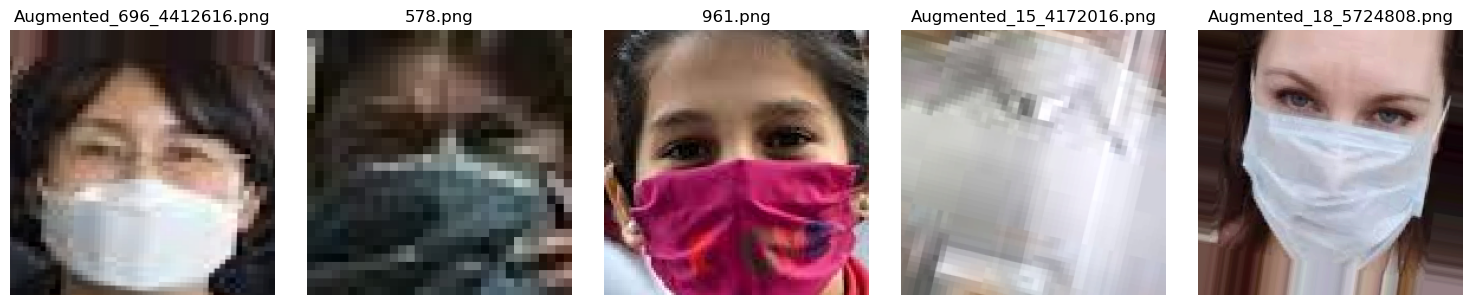

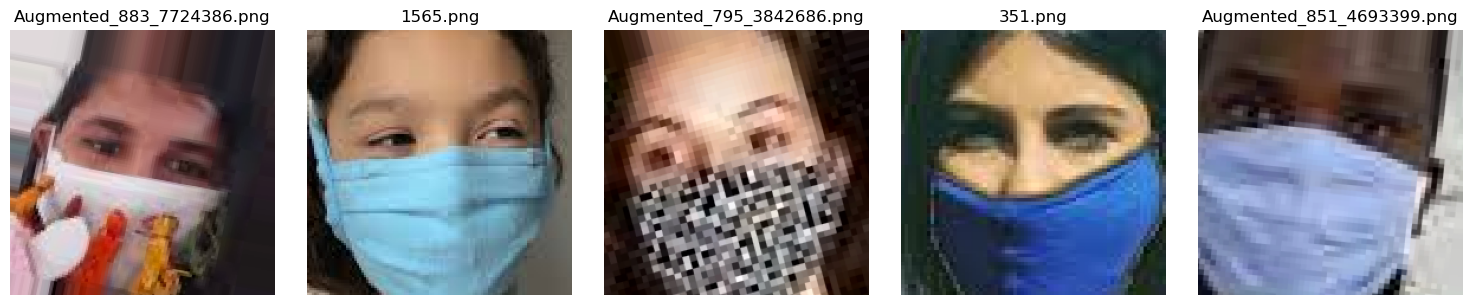

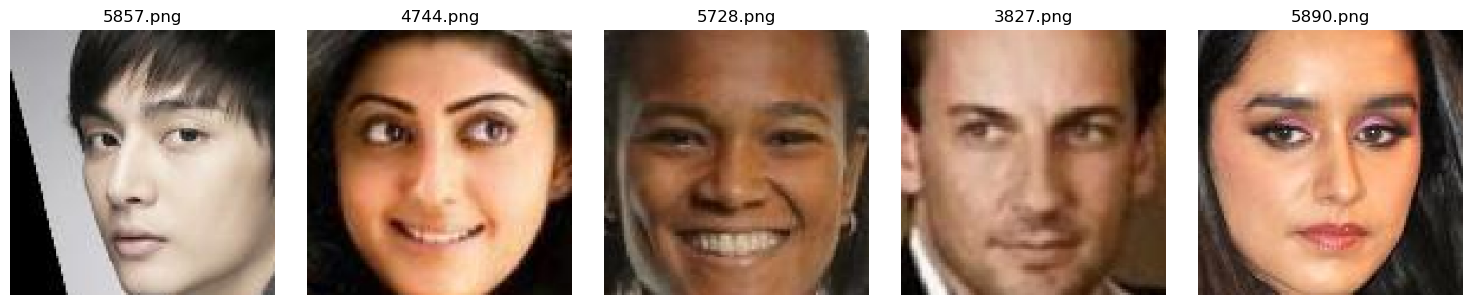

In [12]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image

def plot_images_from_directory(directory, num_samples=5):
    fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(15, 3))
    images = os.listdir(directory)
    
    # Check if the number of samples requested is larger than the number of images in the directory
    if num_samples > len(images):
        print(f"Warning: Number of requested samples ({num_samples}) is larger than the number of images ({len(images)}) in the directory.")
        num_samples = len(images)
    
    sampled_images = random.sample(images, num_samples)
    
    for i, img_name in enumerate(sampled_images):
        img_path = os.path.join(directory, img_name)
        img = image.load_img(img_path, target_size=(image_size, image_size))
        axes[i].imshow(img)
        axes[i].set_title(img_name)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display EDA plots for sampled images from Train, Test, and Validation directories
plot_images_from_directory('C:/Users\HP/latihan python/nama_directori_baru/FaceMaskDataset/Train/WithMask')
plot_images_from_directory('C:/Users\HP/latihan python/nama_directori_baru/FaceMaskDataset/Test/WithMask')
plot_images_from_directory('C:/Users/HP/latihan python/nama_directori_baru/FaceMaskDataset/Validation/WithoutMask')


In [ ]:
# Evaluate the model on the validation data
loss, accuracy = my_new_model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Make predictions on a few validation images
validation_images, validation_labels = next(validation_generator)
predictions = my_new_model.predict(validation_images)

# Display images with their predicted and true labels
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 7))
for i, ax in enumerate(axes.flat):
    ax.imshow(validation_images[i] / 255.)  # rescale to [0,1] for display
    ax.axis('off')
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(validation_labels[i])
    ax.set_title(f'Predicted: {predicted_class}\nTrue: {true_class}', fontsize=10)
plt.tight_layout()
plt.show()


29/40 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.9798 - loss: 0.0746